# importing the required libraries

In [1]:
pwd

'/home/wsuser/work'

In [2]:
!pip install keras
!pip install tensorflow

In [3]:
import numpy as np

In [4]:
import tensorflow as tf

In [5]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from keras.models import load_model

# loading the data

In [6]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# Analyzing the data

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
y_train[0]

5

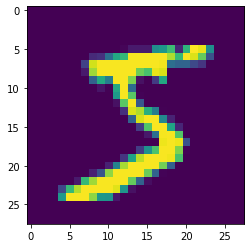

In [10]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [11]:
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [12]:
y_train[2]

4

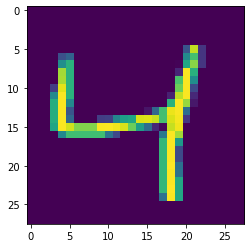

In [13]:
plt.imshow(x_train[2])

# Reshaping the data

In [14]:
# x_train=x_train.reshape(60000,28,28,1).astype('float32')
x_test=x_test.reshape(10000,28,28,1).astype('float32')

# Applying one hot encoding

In [15]:
number_of_classes=10
y_train=np_utils.to_categorical(y_train,number_of_classes)
y_test=np_utils.to_categorical(y_test,number_of_classes)

In [16]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# sprint 2
model building

Add CNN layer


In [17]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape =(28,28,1), activation='relu'))
model.add(Conv2D(32,(3,3),activation ='relu'))
model.add(Flatten())
model.add(Dense(number_of_classes, activation = 'softmax'))

# Compiler the model

In [18]:
model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])


# Train the model

In [19]:
model.fit(x_train,y_train, validation_data = (x_test,y_test),epochs =5,batch_size = 32)

Epoch 1/5
1875/1875 [==============================] - 181s 97ms/step - loss: 0.2455 - accuracy: 0.9512 - val_loss: 0.0966 - val_accuracy: 0.9719
Epoch 2/5
1875/1875 [==============================] - 180s 96ms/step - loss: 0.0705 - accuracy: 0.9790 - val_loss: 0.0862 - val_accuracy: 0.9735
Epoch 3/5
1875/1875 [==============================] - 178s 95ms/step - loss: 0.0496 - accuracy: 0.9843 - val_loss: 0.0801 - val_accuracy: 0.9787
Epoch 4/5
1875/1875 [==============================] - 176s 94ms/step - loss: 0.0378 - accuracy: 0.9881 - val_loss: 0.0928 - val_accuracy: 0.9773
Epoch 5/5
1875/1875 [==============================] - 182s 97ms/step - loss: 0.0281 - accuracy: 0.9914 - val_loss: 0.0985 - val_accuracy: 0.9775


# Observing the metrics 

In [20]:
metrics = model.evaluate(x_test,y_test,verbose = 0)
print("metrics (test loss & test Accuaracy): ")
print(metrics)

metrics (test loss & test Accuaracy): 
[0.09848878532648087, 0.9775000214576721]


# Test the model

In [21]:
prediction = model.predict(x_test[:4])
print(prediction)

[[6.4989331e-10 1.8329138e-16 1.7631841e-08 4.2987494e-08 4.5489994e-16
  1.2355014e-12 2.3716838e-18 1.0000000e+00 2.1794224e-12 2.3078368e-09]
 [1.9866181e-12 4.8808740e-10 9.9942636e-01 1.9943222e-11 8.9793624e-16
  1.8234456e-14 5.7362183e-04 4.0474548e-16 1.4074193e-10 1.3491863e-15]
 [9.3155400e-11 9.9999630e-01 6.0325289e-07 4.0725548e-11 2.2377550e-08
  2.9535705e-09 7.2070208e-08 1.3853143e-09 2.9449291e-06 4.1100033e-11]
 [9.9999976e-01 1.3958339e-15 4.3754458e-09 7.8647287e-17 1.7036896e-12
  1.0687605e-11 2.9250313e-07 1.4139682e-13 1.4495380e-10 5.4859117e-10]]


In [22]:
print(np.argmax(prediction,axis= 1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Observing the metrics

In [23]:
metrics = model.evaluate(x_test,y_test,verbose = 0)
print("metrics (test loss & test Accuaracy): ")
print(metrics)

metrics (test loss & test Accuaracy): 
[0.09848878532648087, 0.9775000214576721]


# saving the model

In [24]:
model.save('mnistCNN.h5')

In [25]:
!tar -zcvf Handwritten-Digit-Recognition_new.tgz mnistCNN.h5

mnistCNN.h5


In [31]:
ll


total 4696
-rw-rw---- 1 wsuser 2329674 Nov 13 13:33 Handwritten-Digit-Recognition_new.tgz
-rw-rw---- 1 wsuser 2475368 Nov 13 13:33 mnistCNN.h5


In [26]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 10.3 MB/s eta 0:00:01


In [27]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"5RBIRNgk6sVKg4z9qPG-YsaXbNrN42BWVUfZWgfnEw7b"
}
client=APIClient(wml_credentials)

In [28]:
client=APIClient(wml_credentials)

In [29]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"]==space_name)['metadata']['id'])

In [36]:
space_uid=guid_from_space_name(client,'Handwritten digit recognition')
print("Space UID="+space_uid)

Space UID=cf45241c-394d-448d-9725-cecce9f50ba5


In [37]:
client.set.default_space(space_uid)

'SUCCESS'

In [38]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [39]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [40]:
model_details = client.repository.store_model(model="Handwritten-Digit-Recognition_new.tgz", meta_props={
    client.repository.ModelMetaNames.NAME: "CNN",
    client.repository.ModelMetaNames.TYPE: "tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
})

model_id = client.repository.get_model_id(model_details)

In [41]:
model_id

'56cb20cc-38ae-4e37-b214-073de2cae969'

In [46]:
client.repository.download(model_id,"model.tar.gz")

Successfully saved model content to file: 'model.tar.gz'


'/home/wsuser/work/model.tar.gz'